In [1]:
import astropy.units as u
from astropy.constants import G as _G
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gary.units import galactic
import gary.potential as gp

import biff
G = _G.decompose(galactic).value

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
def _plummer_density(x, y, z, M, r_s):
    """
    .. warning::

        THIS IS AN INTERNAL FUNCTION -- USE ``plummer_density()`` INSTEAD.

    """
    r2 = x*x + y*y + z*z
    return (3*M / (4*np.pi*r_s**3)) * (1 + r2/r_s**2)**(-5/2.)

In [3]:
x = np.linspace(0, 10, 10000)
y = np.zeros(10000)
z = np.zeros(10000)

rho_plummer = _plummer_density(x, y, z, 1/G, 1.0)

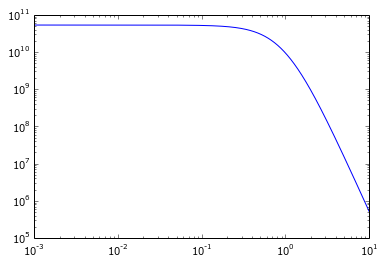

In [4]:
plt.loglog(x, rho_plummer)
#plt.ylim(0, 5)

In [6]:
r = np.linspace(0, 10, 10000)
X = []
Y = []
N = 0
for i in range(len(r)):
    rho = _plummer_density(r[i], 0, 0, 1/G, 1.0)
    N += int(rho/5E9)
    YY = np.random.normal(r[i]/2.0, 0.05, int(rho/5E9))
    XX = np.random.normal(r[i]/2.0, 0.05, int(rho/5E9))

    for j in range(len(YY)):
        if XX[j]>0:
            X.append(XX[j])
            Y.append(YY[j])
print len(X)



5593


(-0.80000000000000004,
 0.80000000000000004,
 -0.80000000000000004,
 0.80000000000000004)

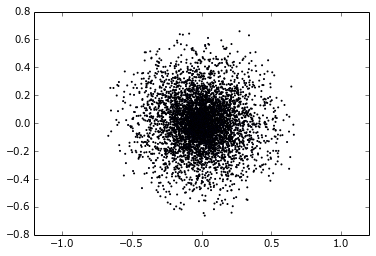

In [363]:
theta = np.random.random(len(X))*2*np.pi
plt.scatter(X*np.cos(theta), X*np.sin(theta), s=1)
plt.axis('equal')

In [8]:
xyz = np.zeros((len(X),3))
xyz[:,0] = X
xyz.shape[1]

3

In [314]:
def sphere(N_points):
    phi = np.random.rand(N_points)*2.*np.pi
    theta = np.random.rand(N_points)*2. - 1.
    R = np.random.rand(N_points)
    x = 10.0*R**(1./3.) * np.sin(phi)*np.sin(np.arccos(theta))
    y = 10.0*R**(1./3.) * np.cos(phi) * np.sin(np.arccos(theta))
    z = 10.0*R**(1./3.) * np.cos(np.arccos(theta))
    xyz = np.zeros((len(x), 3))
    xyz1 = np.zeros((len(x), 3))
    xyz[:,0] = np.sqrt(x**2.+ y**2. + z**2.)
    xyz[:,1] = 0
    xyz[:,2] = 0
    xyz1[:,0] = x
    xyz1[:,1] = y
    xyz1[:,2] = z
    return xyz, xyz1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-15.0, 15.0, -15.0, 15.0)

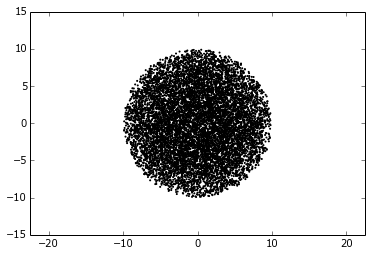

In [323]:
xyz, xyz1 = sphere(10000.0)
#M = np.ones(1000.0)
plt.scatter(xyz1[:,0], xyz1[:,1], c='k', s=1)
plt.axis('equal')

In [410]:
def initial_density(coordinates):
    r = np.sqrt(coordinates[:,0]**2 + coordinates[:,1]**2 + coordinates[:,2]**2)
    rcuts = np.linspace(0, np.max(r), 100)
    rho = np.zeros(100)
    for i in range(len(rho)):
        index = np.where(r<rcuts[i])[0]
        rho[i] = 3*len(index)/(4*np.pi*rcuts[i]**3)
    return rho, rcuts

In [411]:
rho_real = 3*10000.0/(4.0*np.pi*10.0**3-0)
print rho_real

2.38732414638


100 100


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


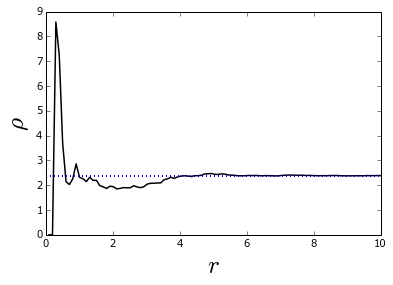

In [428]:
rho_ic, r_ic = initial_density(xyz1)
print len(rho_ic), len(r_ic)
plt.plot(r_ic, rho_ic, c='k',lw=1.5)
plt.xlabel('$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)
plt.axhline(2.38732414638, ls=':', lw=2)


In [452]:
nmax = 16
lmax = 0

Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

nlms = []

for n in range(nmax+1):
    for l in range(lmax+1):
        for m in range(l+1):
            nlms.append([n,l,m])
       
for nlm in nlms:
    n,l,m = nlm
    print(n,l,m)
    S,T = biff.compute_coeffs_discrete(np.ascontiguousarray(xyz), 1.0, nlm, 1.0)
    Snlm[n,l,m] = S
    Tnlm[n,l,m] = T

(0, 0, 0)
(1, 0, 0)
(2, 0, 0)
(3, 0, 0)
(4, 0, 0)
(5, 0, 0)
(6, 0, 0)
(7, 0, 0)
(8, 0, 0)
(9, 0, 0)
(10, 0, 0)
(11, 0, 0)
(12, 0, 0)
(13, 0, 0)
(14, 0, 0)
(15, 0, 0)
(16, 0, 0)


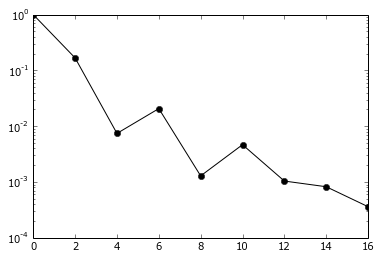

In [453]:
#pl.plot(np.abs(Snlm[:,0,0]/Snlm[0, 0,0]))
plt.semilogy(np.array(nlms)[::2,0], np.abs(Snlm.flat/Snlm[0,0,0])[::2], marker='o', c='k')
#plt.xlim(0,30)
#plt.ylim(1E-6, 1.0)

In [454]:
bfe_dens = biff.density(np.ascontiguousarray(xyz.T), Snlm, Tnlm, nmax, lmax, 1.0, 1.0)

In [455]:
bfe_dens.shape

(10000,)

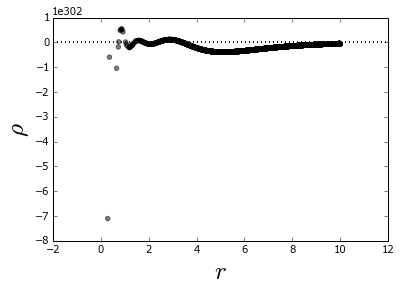

In [458]:
plt.scatter(xyz[:,0], bfe_dens, c='k', alpha=0.5, s=20)
plt.xlabel('$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)
plt.axhline(2.38732414638, ls=':', lw=2)
#plt.plot(r_ic, rho_ic, c='k',lw=1.5)
#plt.ylim(-10, 0.5E304)

In [457]:
print Tnlm

[[[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]

 [[ 0.]]]


In [387]:
xyz1 = np.ascontiguousarray(np.atleast_2d(xyz))
r = np.sqrt(np.sum(xyz1**2, axis=-1))

In [389]:
print min(r)

0.282371585264


In [383]:
np.atleast_2d?